In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving toyota.csv to toyota.csv


In [5]:
df = pd.read_csv('toyota.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


Data Understanding

In [6]:
df['model'].unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [9]:
df.shape

(6738, 9)

Data Cleaning

In [10]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [12]:
df.duplicated().sum()

np.int64(39)

In [13]:
df = df.drop_duplicates()

In [14]:
df.shape

(6699, 9)

Exploratory Data Analysis

In [15]:
df_numeric = df.drop(columns=['model', 'transmission', 'fuelType'], axis=1)

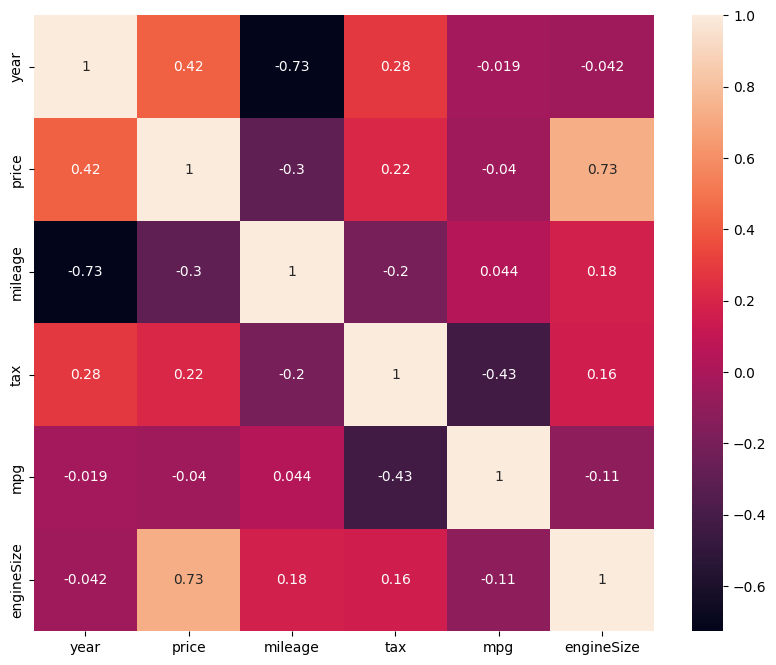

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

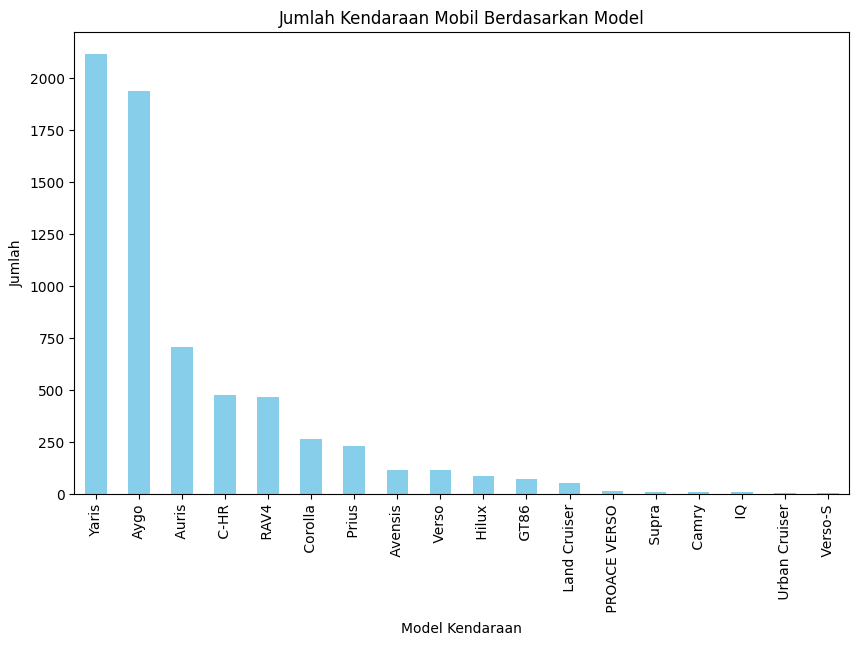

In [19]:
jumlah_kendaraan = df['model'].value_counts()

plt.figure(figsize=(10, 6))
jumlah_kendaraan.plot(kind='bar', color='skyblue')

plt.xlabel('Model Kendaraan')
plt.ylabel('Jumlah')
plt.title('Jumlah Kendaraan Mobil Berdasarkan Model')
plt.show()

/tmp/ipython-input-21-1203877565.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

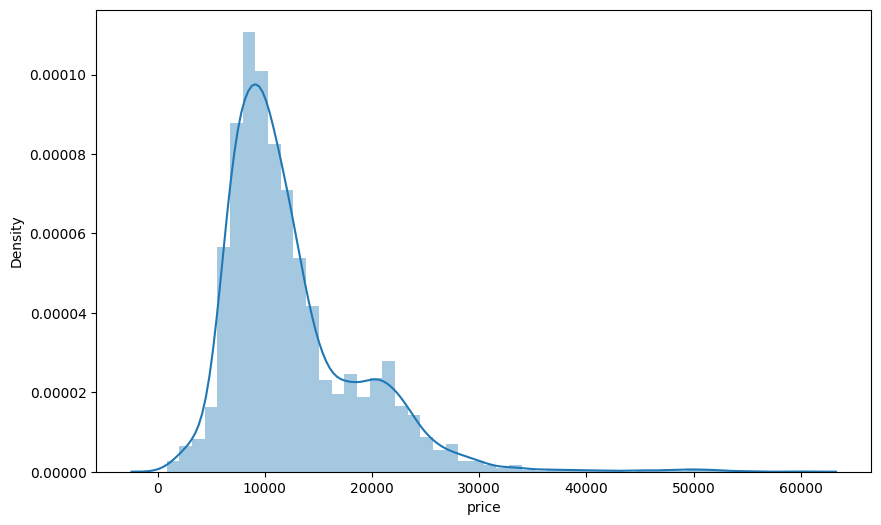

In [21]:
plt.figure(figsize=(10, 6))
sns.distplot(df['price'])

In [22]:
nilai_tukar_euro_ke_rupiah = 16974

df['price'] = df['price'] * nilai_tukar_euro_ke_rupiah
df['tax'] = df['tax'] * nilai_tukar_euro_ke_rupiah

/tmp/ipython-input-22-3770121240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'] * nilai_tukar_euro_ke_rupiah
/tmp/ipython-input-22-3770121240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tax'] = df['tax'] * nilai_tukar_euro_ke_rupiah


In [23]:
df.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
3433,Auris,2015,123825330,Manual,57860,Petrol,2546100,47.9,1.6
5045,Aygo,2017,161168130,Semi-Auto,7311,Petrol,2461230,67.3,1.0
568,RAV4,2017,252861678,Manual,37100,Diesel,2546100,60.1,2.0
519,RAV4,2017,339480000,Automatic,25303,Hybrid,339480,57.6,2.5
4544,Aygo,2016,118733130,Manual,17545,Petrol,0,69.0,1.0


In [24]:
from sklearn.preprocessing import LabelEncoder

m_encoder = LabelEncoder()
t_encoder = LabelEncoder()
f_encoder = LabelEncoder()

df['model'] = m_encoder.fit_transform(df['model'])
df['transmission'] = t_encoder.fit_transform(df['transmission'])
df['fuelType'] = f_encoder.fit_transform(df['fuelType'])

In [25]:
df.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
3217,0,2017,283262112,0,11782,1,0,72.4,1.8
3886,2,2018,135622260,1,13007,3,2461230,68.9,1.0
4501,2,2017,135775026,1,16933,3,2461230,68.9,1.0
571,12,2017,326749500,0,34000,1,339480,57.6,2.5
3241,0,2017,311965146,0,9596,1,0,70.6,1.8


Preparation

In [27]:
features = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
x = df[features]
y = df['price']

x.shape, y.shape

((6699, 8), (6699,))

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_test.shape

(1340,)

Training & Evaluation

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [32]:
score = lr.score(x_test, y_test)
print('Akurasi model Regresi Linear Berganda adalah =', score)

Akurasi model Regresi Linear Berganda adalah = 0.7909694669627094


In [34]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))

print('MAE =', mae)
print('MSE =', mse)
print('RMSE =', rmse)

MAE = 35137626.152064756
MSE = 2493220004614705.0
RMSE = 49932154.01537075


Testing

In [35]:
input_data = {
    'model': 17,
    'year': 2019,
    'transmission': 0,
    'mileage': 1401,
    'fuelType': 3,
    'tax': 2385180,
    'mpg': 76.3,
    'engineSize': 1.5
}

input_df = pd.DataFrame([input_data])

input_df

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,17,2019,0,1401,3,2385180,76.3,1.5


In [37]:
prediction = lr.predict(input_df)
prediction_formatted = round(prediction[0], 2)

print("Estimasi harga mobil = Rp.", prediction_formatted)

Estimasi harga mobil = Rp. 263598247.58
